In [2]:
!ls MGH-100P-CENTERS/KMeansModel_13000K/data
print('-----')
!ls MGH-TEST-100/*
print('-----')
#!cat MGH-TEST-100/100PtSNE_cost.csv
print('-----')
#!cat MGH-TEST-100/100PtSNE_res.csv

part-00000-ca8f488b-612d-42b8-894b-7b12540b2cc1.snappy.parquet	_SUCCESS
-----
MGH-TEST-100/100PtSNE_cost.csv	  MGH-TEST-100/100Pt_tSNE_result.csv
MGH-TEST-100/100PtSNE_res.csv	  MGH-TEST-100/hello.txt
MGH-TEST-100/100Pt_tSNE_cost.csv
-----
-----


In [1]:
# data selection
import numpy
import pandas as pd
# Load from jingjing
#!ls Jingjing/raw
lfiles=!find Jingjing/raw/*.parq -type f
lfiles=list(lfiles)
#print(lfiles)

df_parq=pd.DataFrame(lfiles,columns=['filep'])
df_parq['idf']=df_parq.filep.str.extract('.*/(.*)\.mat.*')

df_parq['pt_id']=df_parq.idf.str.extract('(.*)_seg[0-9]*_.*')
df_parq['pt_num_id']=df_parq.pt_id.str.extract('[a-z]*([0-9][0-9]*)',expand=False).map(int)
df_parq['seg_id']=df_parq.idf.str.extract('.*_seg([0-9]*)_.*').map(int)
df_parq['st_id']=df_parq.idf.str.extract('.*_seg[0-9]*_(.*)').str.replace('_','').map(int)



/usr/local/src/conda3_runtime.v16/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/src/conda3_runtime.v16/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/src/conda3_runtime.v16/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/src/conda3_runtime.v16/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: currently extract(expand=None) means expand=False (

In [3]:
# see cases separate

#print(list(df_parq['pt_num_id']))

#l_cases=list(set(df_parq['pt_id']))
#print(l_cases)
#print(len(l_cases))

#l_cases=list(set(df_parq['st_id']))
#print(l_cases)
#print(len(l_cases))
#
#l_cases=list(set(df_parq['seg_id']))
#print(l_cases)
#print(len(l_cases))

In [4]:
# seizure
# specify by st_id
#pt=['sz1','sz2','sz3','sz4','sz5','sz6','sz7']
#pt=l_cases[:len(l_cases)]
#print(pt)

# sz
#pt=[e for e in l_cases if e[0:2] == 'sz']


# lpd
#pt=[e for e in l_cases if e[0:3] == 'lpd']

# lrda
#pt=[e for e in l_cases if e[0:4] == 'lrda']
#print(pt)

df_flist=df_parq.ix[df_parq['pt_id'].str.contains('sz')]

df_flist=df_flist.sort_values(['pt_num_id'])
#print(df_flist)
print(list(set(df_flist['pt_id'])))
print(len(set(df_flist['pt_id'])))


l_load_files=list(df_flist['filep'])
#print(l_load_files)
print(set(df_parq['pt_id']))
print(len(set(df_parq['pt_id'])))

['sz11', 'sz8', 'sz22', 'sz32', 'sz76', 'sz9', 'sz39', 'sz14', 'sz43', 'sz75', 'sz20', 'sz18', 'sz16', 'sz41', 'sz93', 'sz54', 'sz55', 'sz56', 'sz79', 'sz28', 'sz96', 'sz15', 'sz23', 'sz19', 'sz97', 'sz10', 'sz24', 'sz94', 'sz59', 'sz45', 'sz35', 'sz78', 'sz83', 'sz88', 'sz89', 'sz7', 'sz42', 'sz73', 'sz95', 'sz34', 'sz52', 'sz53', 'sz51', 'sz38', 'sz44', 'sz46', 'sz6', 'sz31', 'sz13', 'sz72', 'sz2', 'sz12', 'sz30', 'sz37', 'sz50', 'sz81', 'sz40', 'sz58', 'sz48', 'sz70', 'sz47', 'sz5', 'sz74', 'sz3', 'sz27', 'sz57', 'sz71', 'sz36', 'sz98', 'sz17', 'sz4', 'sz1', 'sz25', 'sz80', 'sz33', 'sz84', 'sz86', 'sz100', 'sz77', 'sz87', 'sz29', 'sz85', 'sz49', 'sz91']
84
{'sz11', 'sz9', 'sz39', 'lrda15', 'sz41', 'sz55', 'sz79', 'lrda10', 'sz96', 'sz15', 'lrda5', 'sz19', 'sz24', 'sz94', 'sz88', 'sz45', 'sz83', 'sz7', 'sz42', 'sz6', 'sz31', 'sz13', 'sz72', 'sz70', 'sz48', 'sz27', 'sz57', 'lrda14', 'sz80', 'lpd18', 'sz85', 'lrda4', 'sz22', 'lrda8', 'sz32', 'sz43', 'sz20', 'sz54', 'lpd2', 'lpd3', 'sz2

In [5]:
def set_hadoop_config_with_credentials(name):
    prefix = 'fs.swift2d.service.' + name
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + '.auth.url', 'https://identity.open.softlayer.com'+'/v3/auth/tokens')
    hconf.set(prefix + '.auth.endpoint.prefix', 'endpoints')
    hconf.set(prefix + '.tenant', 'a9fb4d478e3d40a8bbd54c5a2ecf25a3')
    hconf.set(prefix + '.username', '6a4cc8251c1940179a6cccc9098a15e0')
    hconf.set(prefix + '.password', 'kDTcKA2H(3eo5.G0')
    hconf.setInt(prefix + '.http.port', 8080)
    hconf.set(prefix + '.region', 'dallas')
    hconf.setBoolean(prefix + '.public', True)

name = 'keystone'
set_hadoop_config_with_credentials(name)

from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import DoubleType

#pt_id='sz5'

#case1 = spark.read.csv("swift2d://MGH." + name + "/csv/csv_case1.csv",\
#                       inferSchema=True,nanValue=0,positiveInf=0,negativeInf=0)
#case1 = spark.read.option('inferSchema',True).option('nanValue',0).option('positiveInf',0).option('negativeInf',0).parquet("Jingjing/raw/sz5_*.parq")
#case1 = spark.read.option('inferSchema',True).option('nanValue',0).option('positiveInf',0).option('negativeInf',0).parquet("Jingjing/raw/sz5_seg2_20140502_001050.mat.parq")
#case1 = spark.read.option('inferSchema',True).option('nanValue',0).option('positiveInf',0).option('negativeInf',0).parquet("Jingjing/raw/"+pt_id+"_*.parq")

print('loading num',len(l_load_files))
case1 = spark.read.option('inferSchema',True).option('nanValue',0).option('positiveInf',0).option('negativeInf',0).parquet(*l_load_files)
all_count=case1.count()                       
print(all_count)

loading num 796
12024699


In [6]:
##from fastparquet import ParquetFile
##parq=ParquetFile('Jingjing/raw/sz1_seg2_20150329_060825.mat.parq')
#import pyarrow.parquet as pq
#
##data=ParquetFile(elt)
#path='Jingjing/raw/sz1_seg2_20150329_060825.mat.parq'
#data = pq.ParquetFile(path)
#print(data.__class__)
#print(data.metadata)
##print(data.schema)
#df1 = pq.read_table(path).to_pandas()
#print(df1)

In [7]:
# adding filename

from pyspark.sql.functions import input_file_name

#l_load_files=['Jingjing/raw/sz1_seg2_20150329_060825.mat.parq', 'Jingjing/raw/sz2_seg4_20121221_222329.mat.parq']
#ll=sorted(l_load_files)
#print(ll)
#case = spark.read.option('inferSchema',True).option('nanValue',0).option('positiveInf',0).option('negativeInf',0).parquet(*l_load_files)
#names = case.select(input_file_name())
#names.show()
import os
case1=case1.withColumn("filename", input_file_name())
#case_name=case.withColumn("filename",udf(case_name.filename))
#case_name.take(2)
#df=case.toPandas()
#print(df)

#f_rdd=sc.parallelize(l_load_files)
#print(f_rdd.collect())
#rddData=f_rdd.map(lambda e: load_data(e))

#case_name.show()


In [95]:
# union
#l_load_files=['Jingjing/raw/sz1_seg2_20150329_060825.mat.parq', 'Jingjing/raw/sz2_seg4_20121221_222329.mat.parq']
#
#dfs = [spark.read.parquet(path) for path in l_load_files]
#
#rddData=spark.createDataFrame(sc.union([df.rdd for df in dfs]), dfs[0].schema)

In [100]:
#case = spark.read.option('inferSchema',True).option('nanValue',0).option('positiveInf',0).option('negativeInf',0).parquet('Jingjing/raw/sz1_seg2_20150329_060825.mat.parq')
#case.take(1)
#rddData.take(1)
#ct=rddData.count()
#print(ct)

21228


In [8]:
case1=case1.na.fill(0)

In [9]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import lit, when

def replaceStrings(c, v):
    is_string = c.isin([
        lit("Inf").cast("string"),
        lit("NaN").cast("string")
    ])
    return when(is_string, v).otherwise(c)

for col in case1.schema:
    print(col.dataType)
    #if col.dataType == StringType():
    if (False):
        print(col.name)
        #if the column is of string type
        #if the string cannot be converted to a number, make it 0, if it can, make it that number
        case1 = case1.withColumn(col.name + "temp", replaceStrings(case1[col.name], lit(0)).cast(DoubleType()))
        case1 = case1.drop(col.name).withColumnRenamed(col.name + "temp",'_c'+col.name)

DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType
DoubleType

In [10]:
import numpy as np
case1 = case1.replace(float(np.nan), 0)
case1 = case1.fillna(0)

In [13]:
# stamp time - skippable

from pyspark.sql.functions import monotonically_increasing_id 

case1 = case1.withColumn("timeId", monotonically_increasing_id())
#case1.take(1)

In [11]:
case1.printSchema()

root
 |-- 0: double (nullable = false)
 |-- 1: double (nullable = false)
 |-- 2: double (nullable = false)
 |-- 3: double (nullable = false)
 |-- 4: double (nullable = false)
 |-- 5: double (nullable = false)
 |-- 6: double (nullable = false)
 |-- 7: double (nullable = false)
 |-- 8: double (nullable = false)
 |-- 9: double (nullable = false)
 |-- 10: double (nullable = false)
 |-- 11: double (nullable = false)
 |-- 12: double (nullable = false)
 |-- 13: double (nullable = false)
 |-- 14: double (nullable = false)
 |-- 15: double (nullable = false)
 |-- 16: double (nullable = false)
 |-- 17: double (nullable = false)
 |-- 18: double (nullable = false)
 |-- 19: double (nullable = false)
 |-- 20: double (nullable = false)
 |-- 21: double (nullable = false)
 |-- 22: double (nullable = false)
 |-- 23: double (nullable = false)
 |-- 24: double (nullable = false)
 |-- 25: double (nullable = false)
 |-- 26: double (nullable = false)
 |-- 27: double (nullable = false)
 |-- 28: double (nullable

In [133]:
case1.take(3)

[Row(0=1.1551780570378734, 1=0.9104019241131589, 2=1.3353535457663828, 3=1.6576251973009333, 4=0.5338988340577089, 5=0.42621734570082365, 6=0.6051668151822223, 7=0.7059987757699218, 8=0.5257457179258089, 9=0.4230153414457414, 10=0.5915845132896768, 11=0.6965810721143262, 12=0.46832118928478417, 13=0.40969494970495407, 14=0.5703178992671056, 15=0.6968597928738571, 16=21.73186873530136, 17=21.977279530586586, 18=21.45797604684485, 19=22.49978753289337, 20=8.097923981776091, 21=9.181241123043378, 22=8.338307769518323, 23=9.552763837159272, 24=2.891057145933905, 25=2.5860184792718472, 26=3.5513478656940665, 27=3.6737124303243567, 28=2.6559091579731726, 29=2.2196578341104787, 30=3.2769356658790896, 31=2.80464652293366, 32=95063.05778886503, 33=74002.44168649887, 34=108098.134746412, 35=139362.26242925954, 36=21324.17342989097, 37=16934.490785273112, 38=21501.757979262442, 39=27991.08937307264, 40=7588.900859698457, 41=6659.332493622474, 42=6897.194237721979, 43=8836.519991214105, 44=2522.08

In [133]:
from pyspark.mllib.linalg import DenseVector

a = DenseVector([1.0,2.0,3.0,4.0,5.0])

print(a[1])
# 2.0

2.0


In [136]:
#case_tsne=case1

In [11]:
from pyspark.ml.feature import PCA, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import UserDefinedFunction
from pyspark.ml.feature import VectorAssembler 

#feature_cols = list(filter(lambda x:x not in ['id'],case1.columns))
feature_cols=[str(e) for e in list(range(576))]
print('features',feature_cols)
assembler = VectorAssembler(inputCols=feature_cols,outputCol='features')
case1 = assembler.transform(case1)

case1.printSchema()

features ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '

In [14]:
# stamp time - skippable

#from pyspark.sql.functions import monotonically_increasing_id

#case1 = feats.withColumn("timeId", monotonically_increasing_id())
#case1.take(1)

In [12]:
from pyspark.sql.types import StringType, DoubleType, ArrayType
from pyspark.sql.functions import udf

#In Spark < 2.0 import:
from pyspark.ml.linalg import Vectors, VectorUDT

F1 = udf(lambda vs: Vectors.dense(vs.toArray()), VectorUDT())
#F1 = udf(lambda x: DenseVector(x.toArray()), ArrayType(DoubleType()))

case1 = case1.withColumn("features_row",F1(case1["features"]))
#new_df = case1.select("features").map(lambda x: DenseVector(x.toArray())) .select('User_ID').map(lambda x:(x,1)).take(5)

In [145]:
case1.take(5)

[Row(0=1.1551780570378734, 1=0.9104019241131589, 2=1.3353535457663828, 3=1.6576251973009333, 4=0.5338988340577089, 5=0.42621734570082365, 6=0.6051668151822223, 7=0.7059987757699218, 8=0.5257457179258089, 9=0.4230153414457414, 10=0.5915845132896768, 11=0.6965810721143262, 12=0.46832118928478417, 13=0.40969494970495407, 14=0.5703178992671056, 15=0.6968597928738571, 16=21.73186873530136, 17=21.977279530586586, 18=21.45797604684485, 19=22.49978753289337, 20=8.097923981776091, 21=9.181241123043378, 22=8.338307769518323, 23=9.552763837159272, 24=2.891057145933905, 25=2.5860184792718472, 26=3.5513478656940665, 27=3.6737124303243567, 28=2.6559091579731726, 29=2.2196578341104787, 30=3.2769356658790896, 31=2.80464652293366, 32=95063.05778886503, 33=74002.44168649887, 34=108098.134746412, 35=139362.26242925954, 36=21324.17342989097, 37=16934.490785273112, 38=21501.757979262442, 39=27991.08937307264, 40=7588.900859698457, 41=6659.332493622474, 42=6897.194237721979, 43=8836.519991214105, 44=2522.08

In [15]:
cnt=case1.count()
print(cnt)

12024699

In [31]:
# derive IQR stats

cols=case1.columns
l=[]
for e in cols:
    #print("%{e}s" % e)
    ln="percentile_approx(%s, 0.25) as %s_25th, percentile_approx(%s, 0.5) as %s_50th, percentile_approx(%s, 0.75) as %s_75th," % (e,e,e,e,e,e)
    l.append(ln)
expr=",".join(l)
sql="select "+expr+ " from df_cases"
#case1.select(sql)
def lowerbound(elt):
    ""
    
def upperbound(elt):
    ""
    
ll= [(e[0],e[1],e[2],lowerbound(e),upperbound(e)) for e in lres]

percentile_approx(0, 0.25) as 0_25th, percentile_approx(0, 0.5) as 0_50th, percentile_approx(0, 0.75) as 0_75th,
percentile_approx(1, 0.25) as 1_25th, percentile_approx(1, 0.5) as 1_50th, percentile_approx(1, 0.75) as 1_75th,
percentile_approx(2, 0.25) as 2_25th, percentile_approx(2, 0.5) as 2_50th, percentile_approx(2, 0.75) as 2_75th,
percentile_approx(3, 0.25) as 3_25th, percentile_approx(3, 0.5) as 3_50th, percentile_approx(3, 0.75) as 3_75th,
percentile_approx(4, 0.25) as 4_25th, percentile_approx(4, 0.5) as 4_50th, percentile_approx(4, 0.75) as 4_75th,
percentile_approx(5, 0.25) as 5_25th, percentile_approx(5, 0.5) as 5_50th, percentile_approx(5, 0.75) as 5_75th,
percentile_approx(6, 0.25) as 6_25th, percentile_approx(6, 0.5) as 6_50th, percentile_approx(6, 0.75) as 6_75th,
percentile_approx(7, 0.25) as 7_25th, percentile_approx(7, 0.5) as 7_50th, percentile_approx(7, 0.75) as 7_75th,
percentile_approx(8, 0.25) as 8_25th, percentile_approx(8, 0.5) as 8_50th, percentile_approx(8, 

In [13]:
# Filtering vector rows

from pyspark.sql.functions import col
from pyspark.mllib.linalg import SparseVector, DenseVector
from pyspark.sql.types import DoubleType

def udf_convert_to_dense(vec):
    return _udf_convert_to_dense(vec)

from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf
list_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())

def _udf_convert_to_dense(elt):
    return DenseVector(elt.toArray())
udf_convert_to_dense = udf(udf_convert_to_dense, DoubleType())

#udf_convert_to_dense = udf(lambda l: Vectors.dense(l.toArray()), VectorUDT())

# option 1
#feats = case1.withColumn('combinedFeatures',udf_convert_to_dense('features'))
# option 2

feats=case1.filter((col("1") > 0.0000001) & (col("100") > 0.0000001) & (col("1") < 1000000) & (col("100") < 1000000))
feats.cache()
print(feats.count())
#feats.take(1)

11490492


In [155]:
# Normalization_1

from pyspark.ml.feature import PCA, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import UserDefinedFunction
from pyspark.ml.feature import VectorAssembler 

#feature_cols = list(filter(lambda x:x not in ['id'],case1.columns))
#assembler = VectorAssembler(inputCols=feature_cols,outputCol='features')
#df = assembler.transform(case1)
#feats=case1
# Standardize
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(feats)
# Normalize each Train feature to have unit standard deviation.
df = scalerModel.transform(feats)




In [19]:
from pyspark.sql.functions import array, udf
from pyspark.sql.types import FloatType

combined = array(*(col(str(x)) for x in range(576)))
median_udf = udf(lambda xs: float(np.median(xs)), FloatType())

sel=feats.select(median_udf(combined).alias("median"))
print(sel)

DataFrame[median: float]


In [20]:
meds=sel.collect()

In [25]:
print(meds)

In [35]:
print(l)

DataFrame[1: double, 2: double]


In [36]:
print(l.take(1))

[Row(1=0.9104019241131589, 2=1.3353535457663828)]


In [29]:
feats.count()

11490492

In [37]:
%%time
# Normalization two

#from pyspark.sql import DataFrameStatFunctions as statFunc
l=[]
for e in list(range(576)):
    med = feats.approxQuantile(str(e), [0.25,0.5,0.75], 0.1)
    l.append(med)
#med = feats.approxQuantile( "1", [0.25], 0.1)
#med = feats.approxQuantile( "1", [0.75], 0.1)



In [43]:
#!ls cat stats_consts.csv
import pandas as pd
df=pd.read_csv('stats_consts.csv')
#print(df)
l=df.values.tolist()
print(l)

             0          1           2
0     0.997709   2.838248    8.528611
1     0.915605   2.270131    6.634405
2     1.391278   2.246728    5.797787
3     1.831720   2.412256    7.013989
4     0.948351   2.044422    5.586183
5     1.230076   1.789094    7.259378
6     1.203920   2.611953    4.852428
7     1.062205   2.360901    6.256449
8     1.281978   2.004464    9.050981
9     1.349200   2.652830   16.620479
10    1.660896   2.571498    5.704248
11    2.015254   3.856906    5.979210
12    1.123990   2.388808    4.596921
13    1.138904   1.478657    3.812893
14    1.298635   1.882183    4.432450
15    1.079221   1.927834    6.879912
16    3.462547   3.909035    9.403196
17    3.405367   4.699789    9.161136
18    3.455095   4.627367   16.167862
19    3.406724   3.921788    6.642243
20    3.361312   3.723955   21.282136
21    3.496969   3.941312    8.033416
22    3.138412   3.924283    7.820493
23    3.101755   3.754963    6.435545
24    3.110996   3.637442    4.756665
25    3.2202

In [44]:
print(len(l))
def normalize_IQR(elt):
    ""
    iqr=elt[2] - elt[0]
    lower_bound=elt[2] + 1.5 * iqr
    upper_bound=elt[0] - 1.5 * iqr
    return elt,iqr,lower_bound,upper_bound

l2=[normalize_IQR(e) for e in l]
print(l2)

576
[([0.9977087670920172, 2.8382475939424423, 8.528611325986063], 7.530902558894046, 19.824965164327132, -10.298645071249052), ([0.9156053543492336, 2.2701314395178644, 6.634404624040173], 5.7187992696909395, 15.212603528576583, -7.662593550187175), ([1.3912784591772862, 2.246728031664825, 5.797787250860286], 4.406508791683, 12.407550438384785, -5.218484728347214), ([1.8317196453043327, 2.412255864904603, 7.0139891337014495], 5.182269488397116, 14.787393366297124, -5.941684587291341), ([0.9483509406426676, 2.044422426515728, 5.586183087642616], 4.637832146999949, 12.542931308142538, -6.008397279857256), ([1.2300756218931157, 1.789094479440806, 7.259378150468708], 6.029302528575592, 16.303331943332097, -7.813878170970272), ([1.2039198365502584, 2.611953046817937, 4.852427566771847], 3.6485077302215885, 10.32518916210423, -4.268841758782124), ([1.0622046705377075, 2.360900538779997, 6.2564485922874375], 5.19424392174973, 14.047814474912032, -6.729161212086887), ([1.2819775515062273, 2.0

In [47]:
# register cases
case1.registerTempTable('df_cases')

In [50]:
spark.sql("select min(timeId) from df_cases").take(1)

[Row(min(timeId)=0)]

In [57]:
from pyspark.sql.functions import row_number,col
from pyspark.sql.window import Window

w = Window().partitionBy("filename").orderBy(col("timeId").desc())

rows_min=(case1
  .withColumn("rn", row_number().over(w))
  .where(col("rn") == 1)
  .select("filename","timeId"))

l_rows=rows_min.collect().toPandas()
print(len(l_rows),l_rows)

796 [Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/Jingjing/raw/sz71_seg1_20161220_062423.mat.parq', timeId=4191888092469), Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/Jingjing/raw/sz85_seg2_20130512_111816.mat.parq', timeId=678604857760), Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/Jingjing/raw/sz93_seg3_20120310_082614.mat.parq', timeId=188978586016), Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/Jingjing/raw/sz15_seg6_20121110_165924.mat.parq', timeId=3006477132192), Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/Jingjing/raw/sz15_seg7_20121111_231659.mat.parq', timeId=3770981315412), Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34

In [ ]:


# figure out min timeId and apply to timeId

#spark.sql("select min(timeId) over partition by filename from df_cases")


In [46]:
case1.printSchema()

root
 |-- 0: double (nullable = false)
 |-- 1: double (nullable = false)
 |-- 2: double (nullable = false)
 |-- 3: double (nullable = false)
 |-- 4: double (nullable = false)
 |-- 5: double (nullable = false)
 |-- 6: double (nullable = false)
 |-- 7: double (nullable = false)
 |-- 8: double (nullable = false)
 |-- 9: double (nullable = false)
 |-- 10: double (nullable = false)
 |-- 11: double (nullable = false)
 |-- 12: double (nullable = false)
 |-- 13: double (nullable = false)
 |-- 14: double (nullable = false)
 |-- 15: double (nullable = false)
 |-- 16: double (nullable = false)
 |-- 17: double (nullable = false)
 |-- 18: double (nullable = false)
 |-- 19: double (nullable = false)
 |-- 20: double (nullable = false)
 |-- 21: double (nullable = false)
 |-- 22: double (nullable = false)
 |-- 23: double (nullable = false)
 |-- 24: double (nullable = false)
 |-- 25: double (nullable = false)
 |-- 26: double (nullable = false)
 |-- 27: double (nullable = false)
 |-- 28: double (nullable

In [ ]:
def normalize_IQR(cl):
    ""
    coeff=l[int(cl)]
     - coeff[1] /  (coeff[2] - coeff[0])
    return feats

for col in feats.schema:
    print(col.dataType)
    #if col.dataType == StringType():
    if (True):
        print(col.name)
        #if the column is of string type
        #if the string cannot be converted to a number, make it 0, if it can, make it that number
        feats = feats.withColumn(col.name + "temp", normalize_IQR(col.name))
        feats = feats.drop(col.name).withColumnRenamed(col.name + "temp",'_c'+col.name)

In [49]:
#!cd data; tar -zxvf data_2.tar.gz
!ls data

data			encounter_INPUT.csv    med_filter.txt
data_2.tar.gz		icd9_filter.txt        MEDICATION.csv
data.tar.gz		LAB.csv		       medication_orders_INPUT.csv
DIAGNOSTIC.csv		lab_filter.txt	       PATIENT.csv
encounter_dx_INPUT.csv	lab_results_INPUT.csv


In [38]:
# Saving constants
import pandas as pd
df=pd.DataFrame(l)
df.to_csv('stats_consts.csv',index=False)

In [16]:
print(med)

[1.581749778865092, 2.0409847594263426, 4.095975560120836]


In [156]:
pca = PCA(k=100, inputCol="scaledFeatures", outputCol="pcaFeatures")
pcaModel = pca.fit(df)


pca_result = pcaModel.transform(df)
pca_result.count()

11490492

In [157]:
pca_result.take(1)

[Row(0=1.1551780570378734, 1=0.9104019241131589, 2=1.3353535457663828, 3=1.6576251973009333, 4=0.5338988340577089, 5=0.42621734570082365, 6=0.6051668151822223, 7=0.7059987757699218, 8=0.5257457179258089, 9=0.4230153414457414, 10=0.5915845132896768, 11=0.6965810721143262, 12=0.46832118928478417, 13=0.40969494970495407, 14=0.5703178992671056, 15=0.6968597928738571, 16=21.73186873530136, 17=21.977279530586586, 18=21.45797604684485, 19=22.49978753289337, 20=8.097923981776091, 21=9.181241123043378, 22=8.338307769518323, 23=9.552763837159272, 24=2.891057145933905, 25=2.5860184792718472, 26=3.5513478656940665, 27=3.6737124303243567, 28=2.6559091579731726, 29=2.2196578341104787, 30=3.2769356658790896, 31=2.80464652293366, 32=95063.05778886503, 33=74002.44168649887, 34=108098.134746412, 35=139362.26242925954, 36=21324.17342989097, 37=16934.490785273112, 38=21501.757979262442, 39=27991.08937307264, 40=7588.900859698457, 41=6659.332493622474, 42=6897.194237721979, 43=8836.519991214105, 44=2522.08

In [22]:
# optional saving for lpd

#pca_result.write.mode("overwrite").parquet("Jingjing/pca/lpd_cases.parquet")

#pca_result.write.parquet("swift2d://MGH." + name + "/tempParq/case1.parquet")

In [ ]:
#pca_result=spark.read.parquet("Jingjing/pca/lpd_cases.parquet")

In [13]:
#pca_result.show(1)

+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------------+----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+---------------+----------------+----

In [158]:
%%time

pca_result.write.mode("overwrite").parquet("Jingjing/pca/cleaned_100cases.parquet")

CPU times: user 410 ms, sys: 91.5 ms, total: 502 ms
Wall time: 11min 7s


In [159]:
%time

pca_result.count()

11490492

In [ ]:
# group by increasing



In [14]:
# Clustering


import numpy as np

#count=pca_result.count()
#clusterSize=int(np.floor((count) * (0.001)))
##clusterSize
#print('total',clusterSize)

from pyspark.ml.clustering import KMeans

#rddData1.show(10)


#k=clusterSize
#kmeans = KMeans().setK(clusterSize).setSeed(1)
##kmeans.setK(clusterSize)
#kmeansModel=kmeans.fit(rddData1)
#print("Final centers: " + str(model.clusterCenters))
#print("Total Cost: " + str(model.computeCost(data)))
#sc.stop()

#kmeans = KMeans().setFeaturesCol("pcaFeatures").setPredictionCol("kmeanPred").setK(clusterSize)
#kmeansModel = kmeans.fit(rddData1)
#rddData2 = kmeansModel.transform(rddData1)
clusterSize=13000
print('step1')
kmeans = KMeans().setFeaturesCol("pcaFeatures").setK(clusterSize)
print('step2')
kmeansModel = kmeans.fit(pca_result)
print('step3')
kmeansData = kmeansModel.transform(pca_result)



#val data1 = df.select("clusterCenter.values")


step1
step2
step3


In [15]:
from pyspark.sql.functions import monotonically_increasing_id 

kmeansData = kmeansData.withColumn("timeId", monotonically_increasing_id())
#case1.where(case1["_c20"] == 0.0).take(1)
#case1.where(case1["20"] == 0.0).take(1)

#kmeansData.take(1)

In [ ]:
ct=kmeansData.count()
print('kmeans',ct)


In [ ]:
kmeansData.printSchema()

In [ ]:
# save dataset with kmeans
kmeansData.write.mode('overwrite').parquet('Jingjing/kmeans/100cases_full.parquet')

In [ ]:
# load kmeansData set
# spark.read.parquet('Jingjing/kmeans/100cases_full.parquet')

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col
from pyspark.mllib.linalg import SparseVector, DenseVector

window = Window.partitionBy(kmeansData['prediction']).orderBy(kmeansData['timeId'].desc())
kmeansGroup=kmeansData.select('*',rank().over(window).alias('rank')).filter(col('rank') <= 100000)
#kmeansGroup=labels.select('*',rank().over(window).alias('rank')).show()

In [ ]:
kmeansGroup.printSchema()

In [ ]:
kmeansGroup.take(3)

In [ ]:
sampledpt=kmeansGroup.count()
print('sampled',sampledpt)

In [ ]:
kmeansGroup.write.mode("overwrite").parquet("Jingjing/kmeans/100cases_sampled100.parquet")

In [109]:
!ls

Case1		  Case7
Case10		  Case70
Case100		  Case71
Case101		  Case72
Case102		  Case73
Case103		  Case74
Case104		  Case75
Case105		  Case76
Case106		  Case77
Case107		  Case78
Case108		  Case79
Case109		  Case8
Case10_seg10.mat  Case80
Case10_seg1.mat   Case81
Case11		  Case82
Case110		  Case83
Case111		  Case84
Case112		  Case85
Case113		  Case86
Case114		  Case87
Case115		  Case88
Case116		  Case89
Case117		  Case9
Case118		  Case90
Case119		  Case91
Case12		  Case92
Case120		  Case93
Case121		  Case94
Case122		  Case95
Case123		  Case96
Case124		  Case97
Case125		  Case98
Case126		  Case99
Case127		  cluster_pts.csv
Case128		  cnn_lstm.py
Case129		  compute_spectrogram_sunhaoqi.py
Case13		  compute_spectrogram_sunhaoqi.pyc
Case130		  core.13824
Case131		  core.20170816.230254.19172.0001.dmp
Case132		  core.20170816.232356.32178.0001.dmp
Case133		  core.20170817.021840.46164.0001.dmp
Case134		  core.33132
Case135		  debug
Case136		  ele_basic.py
Case137		  ele_simple.py
Case138		  en

In [44]:
# alternative saving mode

print("Cluster Centers: ")
lc=kmeansModel.clusterCenters()

print(len(lc))


Cluster Centers: 
50


In [ ]:
kmeansModel.save("Jingjing/kmeans/100cases.parquet")

In [24]:
kmeansGroup.count()

3731965

In [ ]:
# Cluster before tsne

In [23]:
# load all
kmeans_result=spark.read.option('inferSchema',True).parquet("Jingjing/kmeans/100cases_sampled100.parquet")

In [32]:
# load all
pca_result=spark.read.option('inferSchema',True).parquet("Jingjing/pca/100cases.parquet")

# pca_result=spark.read.option('inferSchema',True).parquet("Jingjing/pca/lpd_cases.parquet")

In [25]:
kmeans_result.count()

3731965

In [46]:
# Create tsne data groups

from pyspark.sql.types import DoubleType,StringType, DecimalType, IntegerType, LongType, StructType, StructField
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, Normalizer, PCA, StandardScaler, MinMaxScaler
from pyspark.sql.functions import lit, when, udf
from pyspark.ml.clustering import KMeans
import pandas as pd
import numpy as np
from pyspark.sql.functions import collect_list
import numpy as np
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.functions import udf
import numpy as np
import pandas as pd

#_cases = kmeansGroup.withColumn("rowid", monotonically_increasing_id())
d_cases = pca_result.withColumn("rowid", monotonically_increasing_id())
p_count=d_cases.count()

pca_result.count()
group_size=100000
def _udf_group(e):
    return int(np.floor(e/group_size))

#def _udf_group(e):
#    return int(np.floor(1))

print(p_count,group_size)

## Define the UDF
udf_group = udf(_udf_group, IntegerType())

# Convert a whole column to uppercase with a UDF.
d_cases = d_cases.withColumn("group_id", udf_group("rowid"))

#print('DF group')
#d_cases.show(100)

df_pack=(d_cases.groupBy("group_id").agg(collect_list("pcaFeatures").alias("split_frames")))

11490492 100000


In [12]:
# debug one pipe

from pyspark.sql.types import DoubleType,StringType, DecimalType, IntegerType, LongType, StructType, StructField
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, Normalizer, PCA, StandardScaler, MinMaxScaler
from pyspark.sql.functions import lit, when, udf
from pyspark.ml.clustering import KMeans
import pandas as pd
import numpy as np
from pyspark.sql.functions import collect_list
import numpy as np
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.functions import udf
import numpy as np
import pandas as pd

#d_cases = kmeansGroup.withColumn("rowid", monotonically_increasing_id())
d_cases = pca_result.withColumn("rowid", monotonically_increasing_id())
p_count=d_cases.count()

pca_result.count()
group_size=100000
def _udf_group(e):
    return int(np.floor(e/group_size))

#def _udf_group(e):
#    return int(np.floor(1))

print(p_count,group_size)

## Define the UDF
udf_group = udf(_udf_group, IntegerType())

# Convert a whole column to uppercase with a UDF.
d_cases = d_cases.withColumn("group_id", udf_group("rowid"))

#print('DF group')
#d_cases.show(100)

df_pack=(d_cases.groupBy("group_id").agg(collect_list("pcaFeatures").alias("split_frames")))

11490492 100000


In [161]:
from pyspark.sql.types import DoubleType,StringType, DecimalType, IntegerType, LongType, StructType, StructField
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, Normalizer, PCA, StandardScaler, MinMaxScaler
from pyspark.sql.functions import lit, when, udf
from pyspark.ml.clustering import KMeans
import pandas as pd
import numpy as np
from pyspark.sql.functions import collect_list
import numpy as np
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql.functions import udf
import numpy as np
import pandas as pd

#d_cases = kmeansGroup.withColumn("rowid", monotonically_increasing_id())
d_cases = pca_result.withColumn("rowid", monotonically_increasing_id())

# group by file type
df_pack=(d_cases.groupBy("filename").agg(collect_list("pcaFeatures").alias("split_frames")))


In [162]:
print(df_pack.count())
#df_pack.show(10)
df_pack.cache()

794


DataFrame[filename: string, split_frames: array<vector>]

In [163]:
df_pack.take(1)

[Row(filename='file:/gpfs/global_fs01/sym_shared/YPProdSpark/user/seff-34c2f0d3dcc620-a916a00b641d/notebook/work/Jingjing/raw/sz71_seg1_20161220_062423.mat.parq', split_frames=[DenseVector([8.4308, 0.8856, -1.097, 3.8397, 2.3835, 2.9091, -5.0098, 1.9898, 1.1416, 0.944, 0.726, -2.6858, 1.649, 1.4378, -1.283, -0.6443, 0.5235, 1.4852, 1.1778, 1.9961, -0.3435, 1.4057, -0.0402, 3.1704, -1.7232, -0.8986, 0.4306, -0.4137, 1.9415, 1.7155, 0.3478, 1.5636, -0.6372, -0.3926, -1.0066, 1.2368, 0.4531, -0.5048, 1.258, -0.5136, -1.3686, -1.2197, -1.9451, 1.6651, -0.4133, 0.0036, -0.7539, -1.9719, -0.7033, -0.2234, 1.1595, 1.0758, 1.9455, -0.4746, 0.9009, -1.0483, 0.5319, -1.2126, -0.5729, 0.3765, -0.7704, 1.8232, 0.1865, -0.3578, -0.1447, 0.8091, -2.5125, -1.0133, 0.5996, -0.9449, 0.71, 0.4658, 0.6844, -1.2964, 0.1329, 0.9246, 0.0935, -1.6163, -0.5868, -2.6281, -0.1479, 2.2575, 1.0963, 0.1194, -0.618, -0.7387, -0.9603, 0.0932, 0.1362, 0.9273, 0.0225, 0.1475, 0.2108, -0.8265, -0.0914, -0.6869, -1.1465

In [164]:
# Functions
%load_ext wurlitzer
# training tSNE - performance tweaked
# TSNE calculation
import numpy as np
import datetime
from MulticoreTSNE import MulticoreTSNE as TSNE

def func_tsne(rdd_data):
    n_cores=48
    perplexity = 30
    n_iter=500

    st=datetime.datetime.now()
    data=np.array(rdd_data[1])
     
    # TODO: To add attributes
    fid=''

    # default - n_iter=1000, perplexity=30, theta=0.5
    tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

    X_2d = tsne.fit_transform(data)
    
    n_components=X_2d.shape
    
    ed=datetime.datetime.now()
    dur=ed-st
    return (st,ed,dur,X_2d,n_cores,n_components)

def func_test(rdd_data):
    st=datetime.datetime.now()
    data=np.array(rdd_data[1])
    n_cores=36
    perplexity=30
    n_iter=4500
 
    n_components=data.shape
    
    ed=datetime.datetime.now()
    dur=ed-st    
    return (st,ed,dur,data,n_components)

In [165]:
d_lrdd=df_pack.rdd
d_lrdd.cache()

MapPartitionsRDD[361] at javaToPython at NativeMethodAccessorImpl.java:0

In [166]:
# test
#d_tsneRdd=d_lrdd.map(lambda e: func_test(e))
d_tsneRdd=d_lrdd.map(lambda e: func_test(e))
d_tsneRdd.cache()

PythonRDD[362] at RDD at PythonRDD.scala:48

In [174]:
d_tsneRes=d_tsneRdd.take(450)

In [175]:
print(d_tsneRes[0])
print(len(d_tsneRes))
n_parts=len(d_tsneRes)

(datetime.datetime(2017, 8, 28, 23, 42, 9, 258155), datetime.datetime(2017, 8, 28, 23, 42, 9, 509252), datetime.timedelta(0, 0, 251097), array([[ 8.43077646,  0.88555206, -1.09702266, ...,  0.42038469,
        -0.57121568,  0.59474956],
       [ 7.59933371,  0.39733991, -0.69869291, ...,  0.87733008,
        -0.36394825,  0.6809582 ],
       [ 8.23990618, -2.91949958,  1.00557559, ..., -0.28989921,
        -1.22844104,  0.94732443],
       ..., 
       [-0.37372361,  3.84870022, -1.24860843, ...,  0.57444831,
        -0.46110348, -0.75699533],
       [-2.54396302,  2.19080669, -1.11608361, ...,  0.08200472,
        -0.78514982,  0.68842668],
       [-4.40775792, -0.25979158, -1.27055614, ...,  0.01900354,
        -0.96882574, -0.43093671]]), (3809, 100))
450


In [176]:
# Produce points

print(len(d_tsneRes))
#n_parts=300
na=np.concatenate([d_tsneRes[i][3] for i in range(n_parts)])
#df_tsne=pd.DataFrame(d_tsneRes)
#df_tsne_pts=pd.concat([pd.DataFrame(e[3]) for e in d_tsneRes])
print(na.shape)
#data=na
print(na[0])

450
(6479080, 100)
[  8.43077646e+00   8.85552065e-01  -1.09702266e+00   3.83972844e+00
   2.38348635e+00   2.90910308e+00  -5.00975398e+00   1.98977798e+00
   1.14160368e+00   9.43967727e-01   7.25966817e-01  -2.68579238e+00
   1.64897179e+00   1.43776197e+00  -1.28296381e+00  -6.44259059e-01
   5.23539156e-01   1.48519937e+00   1.17782776e+00   1.99609771e+00
  -3.43525264e-01   1.40573449e+00  -4.02007384e-02   3.17035549e+00
  -1.72316746e+00  -8.98609766e-01   4.30614842e-01  -4.13666691e-01
   1.94148819e+00   1.71549487e+00   3.47836639e-01   1.56364234e+00
  -6.37249858e-01  -3.92595351e-01  -1.00658659e+00   1.23680883e+00
   4.53139369e-01  -5.04794683e-01   1.25795558e+00  -5.13618212e-01
  -1.36860743e+00  -1.21970043e+00  -1.94506262e+00   1.66505167e+00
  -4.13340861e-01   3.57751462e-03  -7.53869774e-01  -1.97193412e+00
  -7.03252250e-01  -2.23444297e-01   1.15954883e+00   1.07575696e+00
   1.94546399e+00  -4.74601576e-01   9.00889975e-01  -1.04830313e+00
   5.31939257e-

In [ ]:
# Run 4
n_cores=36
perplexity = 30
n_iter=500
try:
    st=datetime.datetime.now()
    #data=np.array(rdd_data[1])

    # default - n_iter=1000, perplexity=30, theta=0.5
    tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

    X_2d_3 = tsne.fit_transform(na)

    #n_components=X_2d.shape

    ed=datetime.datetime.now()
    dur=ed-st
    
    print('finish',dur)
except:
    print('error')

Performing t-SNE using 36 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 4245286
 - point 20000 of 4245286


In [ ]:
import pandas as pd
X_tsne=pd.DataFrame(X_2d_3)
x_tsne.to_csv('tsne_csv_4.csv',index=False)

In [34]:
d_lrdd2=df_pack.rdd
d_lrdd2.cache()

MapPartitionsRDD[233] at javaToPython at NativeMethodAccessorImpl.java:0

In [35]:
d_tsneRdd=d_lrdd2.map(lambda e: func_test(e))
d_tsneRdd.cache()

PythonRDD[235] at RDD at PythonRDD.scala:48

In [36]:
d_tsneRes=d_tsneRdd.collect()

In [52]:
print(d_tsneRes[1])
print(len(d_tsneRes))
n_parts=len(d_tsneRes)

(datetime.datetime(2017, 8, 24, 20, 12, 47, 630755), datetime.datetime(2017, 8, 24, 20, 12, 48, 47016), datetime.timedelta(0, 0, 416261), array([[ -9.92342107,   4.69092985,  -1.02160039, ...,  -0.02160342,
          0.30357965,   0.07968128],
       [ -8.9144515 ,   4.48799012,  -1.03216269, ...,   0.15214188,
          0.05923415,  -0.63694067],
       [ -8.18131451,   4.71756107,  -0.91664483, ...,   0.04036741,
          0.11690165,   0.43176362],
       ..., 
       [-13.80692062,  -2.89225888,  -1.02159668, ...,  -1.05400355,
          0.60287264,   0.52463648],
       [-12.45230459,  -4.52348456,  -1.89492923, ...,   0.15570561,
          1.37379426,   0.16516141],
       [-10.98629483,  -5.33549654,  -2.76665555, ...,  -1.37183924,
         -0.46466743,   0.10983418]]), (8691, 100))
305


In [53]:
# Produce points

print(len(d_tsneRes))
#n_parts=300
na=np.concatenate([d_tsneRes[i][3] for i in range(n_parts)])
#df_tsne=pd.DataFrame(d_tsneRes)
#df_tsne_pts=pd.concat([pd.DataFrame(e[3]) for e in d_tsneRes])
print(na.shape)
data=na
print(data[0])

305
(5805515, 100)
[  1.06782506e+01  -8.95658757e+00  -2.75893471e+00  -5.67091703e+00
   1.37435645e+00  -7.00110564e+00   5.71962087e+00  -1.95158816e+00
   2.64105500e+00   2.41009807e+00  -1.68361763e+00  -2.08150372e+00
  -2.14983233e+00  -3.22121149e-01   1.62167334e+00   1.01710691e+00
   2.50876218e+00   1.97800403e+00   6.72564384e+00   2.07254966e+00
  -7.90683837e-02   2.37650726e+00   1.91405615e+00   1.13207745e+00
   2.72435002e+00   1.42102681e+00  -2.13258841e-01   3.73949103e+00
  -3.30004076e+00   3.81602797e-01   8.21641776e-01  -9.08603166e-01
  -2.76297572e+00  -2.65215814e-02   1.46589737e+00   1.78851147e+00
   7.98337674e-01  -1.12670692e+00   1.66380678e+00   2.47198298e-01
   1.69452910e+00   1.43183985e-02   4.03137730e-02  -1.00981114e+00
  -1.96118978e+00   1.67424152e-01   1.50661912e+00   3.17123920e-01
   1.12723521e+00  -1.08236399e+00   1.91749555e-01  -8.48222334e-01
   4.39093291e+00   2.22765617e+00   5.06934924e-01  -9.41084959e-01
   2.62384433e+

In [54]:
# run 3 - 

n_cores=36
perplexity = 30
n_iter=400
try:
    st=datetime.datetime.now()
    #data=np.array(rdd_data[1])

    # TODO: To add attributes
    #fid=''

    # default - n_iter=1000, perplexity=30, theta=0.5
    tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

    X_2d_3 = tsne.fit_transform(data)

    #n_components=X_2d.shape

    ed=datetime.datetime.now()
    dur=ed-st
    
    print('finish',dur)
except:
    print('error')

Performing t-SNE using 36 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 5805515
 - point 20000 of 5805515
 - point 30000 of 5805515
 - point 40000 of 5805515
 - point 50000 of 5805515
 - point 60000 of 5805515
 - point 70000 of 5805515
 - point 80000 of 5805515
 - point 90000 of 5805515
 - point 100000 of 5805515
 - point 110000 of 5805515
 - point 120000 of 5805515
 - point 130000 of 5805515
 - point 140000 of 5805515
 - point 150000 of 5805515
 - point 160000 of 5805515
 - point 170000 of 5805515
 - point 180000 of 5805515
 - point 190000 of 5805515
 - point 200000 of 5805515
 - point 210000 of 5805515
 - point 220000 of 5805515
 - point 230000 of 5805515
 - point 240000 of 5805515
 - point 250000 of 5805515
 - point 260000 of 5805515
 - point 270000 of 5805515
 - point 280000 of 5805515
 - point 290000 of 5805515
 - point 300000 of 5805515
 - point 310000 of 5805515
 - point 320000 of 5805515

In [ ]:
# run 2 - 

n_cores=36
perplexity = 30
n_iter=400
try:
    st=datetime.datetime.now()
    #data=np.array(rdd_data[1])

    # TODO: To add attributes
    fid=''

    # default - n_iter=1000, perplexity=30, theta=0.5
    tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

    X_2d = tsne.fit_transform(data)

    n_components=X_2d.shape

    ed=datetime.datetime.now()
    dur=ed-st
    
    print('finish')
except:
    print('error')

Performing t-SNE using 36 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 3731965
 - point 20000 of 3731965
 - point 30000 of 3731965
 - point 40000 of 3731965
 - point 50000 of 3731965
 - point 60000 of 3731965
 - point 70000 of 3731965
 - point 80000 of 3731965
 - point 90000 of 3731965
 - point 100000 of 3731965
 - point 110000 of 3731965
 - point 120000 of 3731965
 - point 130000 of 3731965
 - point 140000 of 3731965
 - point 150000 of 3731965
 - point 160000 of 3731965
 - point 170000 of 3731965
 - point 180000 of 3731965
 - point 190000 of 3731965
 - point 200000 of 3731965
 - point 210000 of 3731965
 - point 220000 of 3731965
 - point 230000 of 3731965
 - point 240000 of 3731965
 - point 250000 of 3731965
 - point 260000 of 3731965
 - point 270000 of 3731965
 - point 280000 of 3731965
 - point 290000 of 3731965
 - point 300000 of 3731965
 - point 310000 of 3731965
 - point 320000 of 3731965

In [ ]:
# Do outside of wrapper - failed 8/24/2017 run1
#rdd_data=df_pack.take(1)
#rdd_data=d_tsneRdd.take(1)
n_cores=36
perplexity = 30
n_iter=1200
try:
    st=datetime.datetime.now()
    #data=np.array(rdd_data[1])

    # TODO: To add attributes
    fid=''

    # default - n_iter=1000, perplexity=30, theta=0.5
    tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

    X_2d = tsne.fit_transform(data)

    n_components=X_2d.shape

    ed=datetime.datetime.now()
    dur=ed-st
    
    print('finish')
except:
    print('error')

Performing t-SNE using 36 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 5743930
 - point 20000 of 5743930
 - point 30000 of 5743930
 - point 40000 of 5743930
 - point 50000 of 5743930
 - point 60000 of 5743930
 - point 70000 of 5743930
 - point 80000 of 5743930
 - point 90000 of 5743930
 - point 100000 of 5743930
 - point 110000 of 5743930
 - point 120000 of 5743930
 - point 130000 of 5743930
 - point 140000 of 5743930
 - point 150000 of 5743930
 - point 160000 of 5743930
 - point 170000 of 5743930
 - point 180000 of 5743930
 - point 190000 of 5743930
 - point 200000 of 5743930
 - point 210000 of 5743930
 - point 220000 of 5743930
 - point 230000 of 5743930
 - point 240000 of 5743930
 - point 250000 of 5743930
 - point 260000 of 5743930
 - point 270000 of 5743930
 - point 280000 of 5743930
 - point 290000 of 5743930
 - point 300000 of 5743930
 - point 310000 of 5743930
 - point 320000 of 5743930

In [40]:
# inspect tsne data
print(X_2d.__class__, X_2d.shape,X_2d)

#X_train=l
# Set batch size
batch_size=5000

print(X_2d[0,0],X_2d[0,1])
print(X_2d[:,0]) # X-coords
print(X_2d[:,1]) # Y-coords

df_tsne=pd.DataFrame(X_2d)


<class 'numpy.ndarray'> (3731965, 2) [[ -2.59747281e-05  -1.34970919e-05]
 [  2.13594098e-05  -1.31412422e-05]
 [  2.00255520e-05  -1.55750907e-05]
 ..., 
 [  1.02178503e-05   5.39348688e-07]
 [  5.34329612e-06  -2.84086723e-07]
 [  4.63259804e-06  -1.00765583e-06]]
-2.59747280701e-05 -1.34970919069e-05
[ -2.59747281e-05   2.13594098e-05   2.00255520e-05 ...,   1.02178503e-05
   5.34329612e-06   4.63259804e-06]
[ -1.34970919e-05  -1.31412422e-05  -1.55750907e-05 ...,   5.39348688e-07
  -2.84086723e-07  -1.00765583e-06]


In [43]:
feats=spark.createDataFrame(df_tsne)
kcount=sdf.count()

1328457

In [47]:
feats=sdf
feats.printSchema()

Error in callback <function sys_pipes_forever at 0x7f272b1a9840> (for pre_execute):


RuntimeError: generator didn't yield

root
 |-- 0: double (nullable = true)
 |-- 1: double (nullable = true)



In [46]:
from pyspark.ml.clustering import KMeans

count = feats.count()
clusters = int((count) * (0.001))
print (clusters)


kmeans = KMeans().setFeaturesCol("pcaFeatures").setPredictionCol("kmeanPred").setK(clusters)
kmeansModel = kmeans.fit(feats)
labels = kmeansModel.transform(feats)

print("Cluster Centers: ")
#print labels.select("kmeanPred","timeId","patId","pcaFeatures").take(2)
labels.select("kmeanPred","timeId","pcaFeatures").take(2)


clus=kmeansModel.clusterCenters()


kmeansModel.save("Jingjing/kmeans/lpd_cases_2.parquet")

Error in callback <function sys_pipes_forever at 0x7f272b1a9840> (for pre_execute):


RuntimeError: generator didn't yield

SyntaxError: invalid syntax (<ipython-input-46-b893e65c229e>, line 14)

In [ ]:
!mkdir Jingjing/tsne

In [55]:
# Save tsne pts - Run 3
import pandas as pd

df=pd.Dataframe(X_2d_3)
df.to_csv('Jingjing/tsne/100cases_3.csv',index=False)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
# Save tsne pts
import pandas as pd

df=pd.Dataframe(X_2d)
df.to_csv('Jingjing/tsne/100cases.csv',index=False)


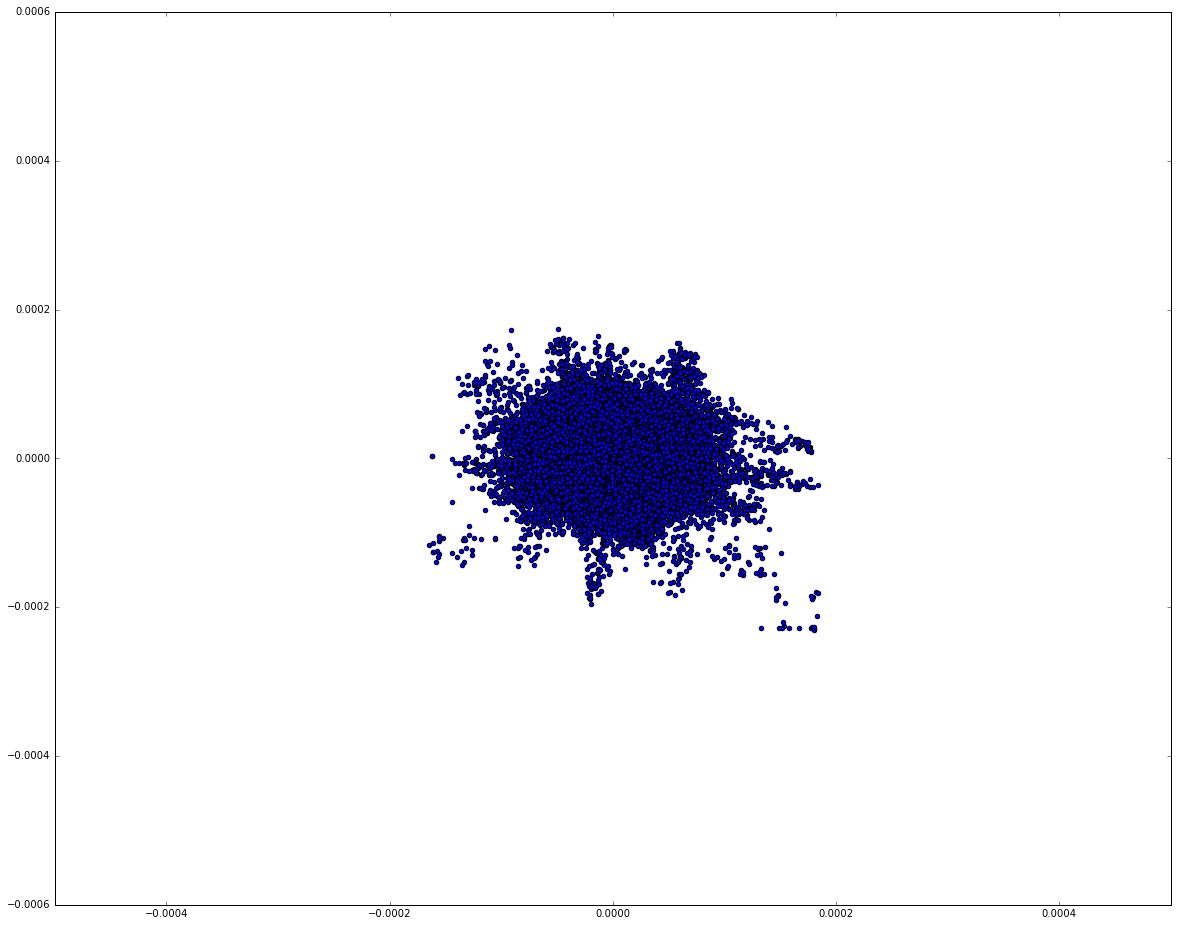

In [56]:
# plot 3
# 400 iteration - 40 cases, non sampled

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.autoscale(enable=True)
plt.scatter(X_2d_3[:,0], X_2d_3[:,1])

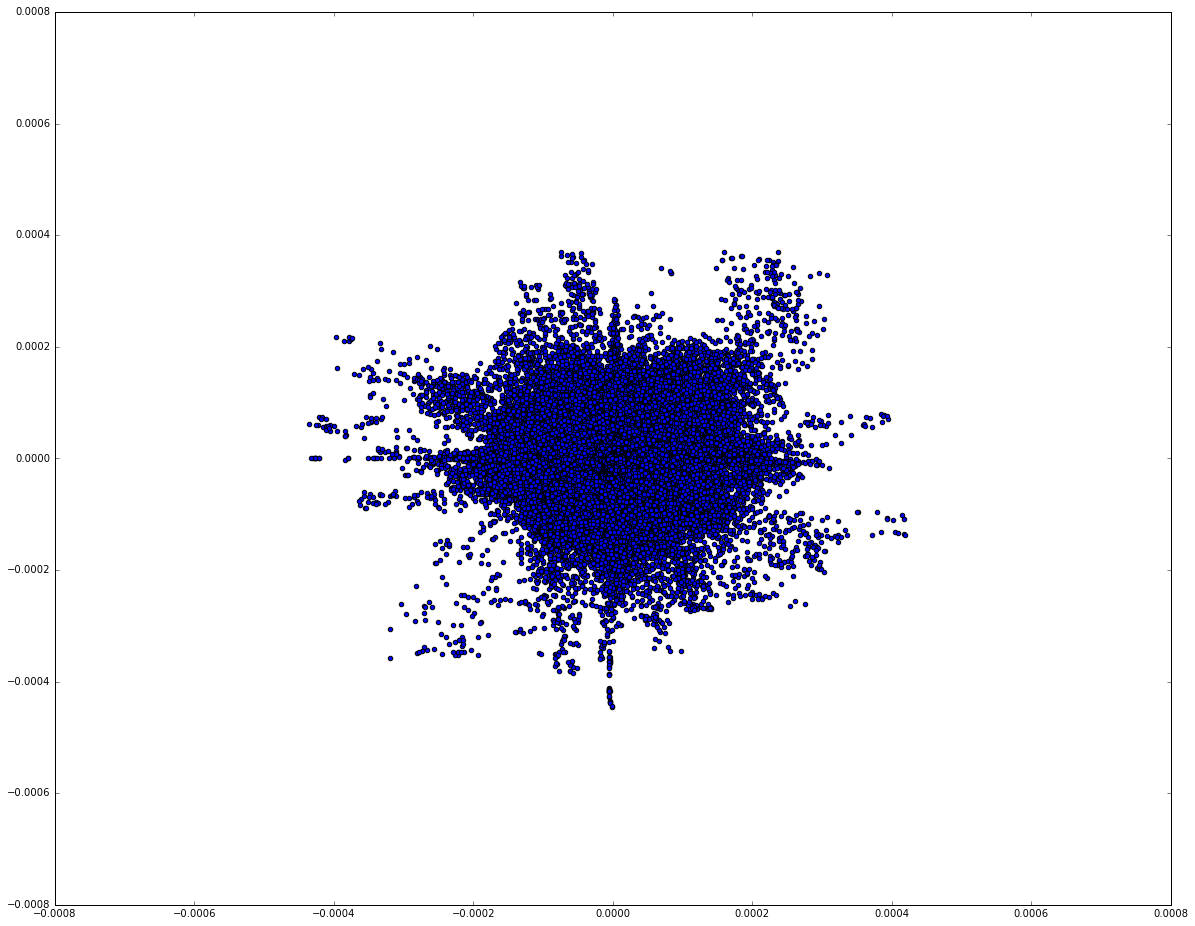

In [43]:
# plot 2
# 400 iteration - 40

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.autoscale(enable=True)
plt.scatter(X_2d[:,0], X_2d[:,1])

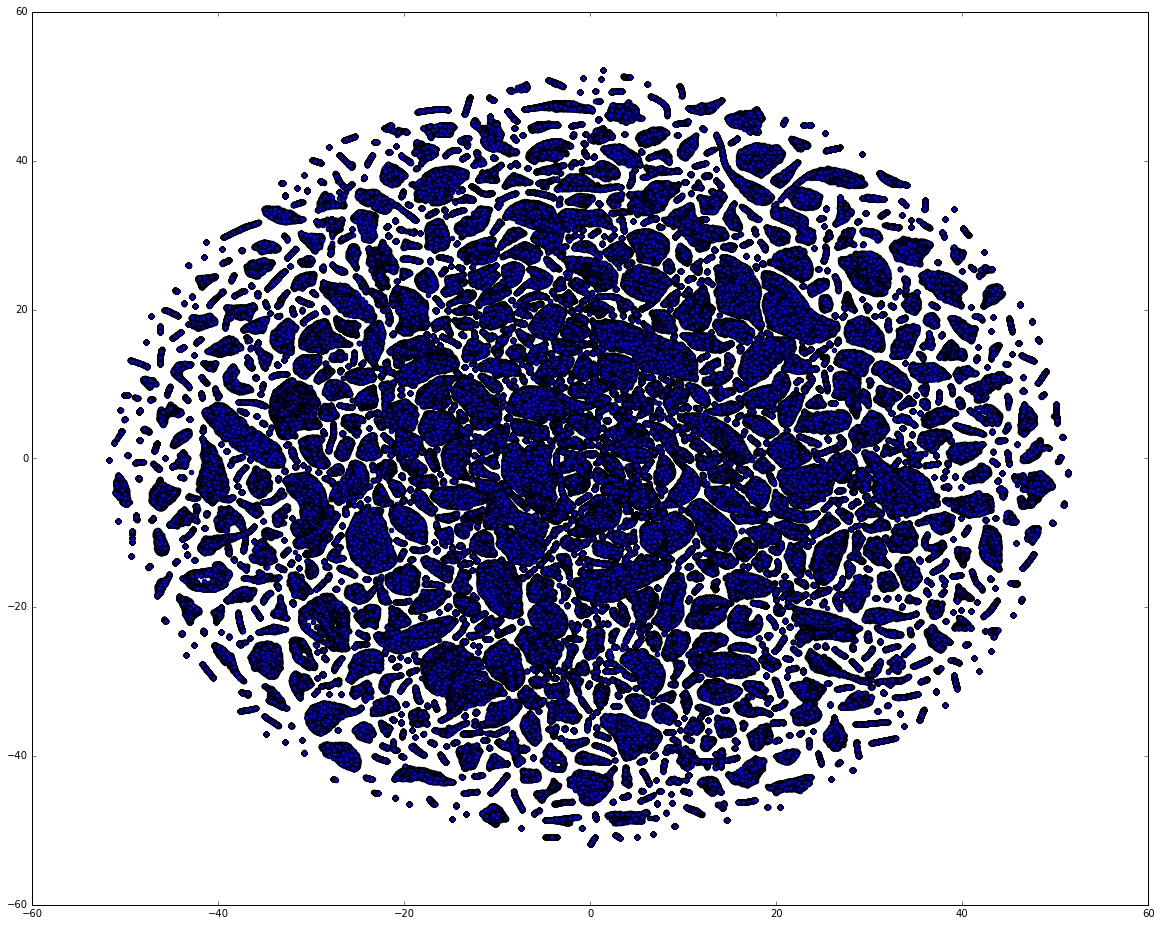

In [40]:
# plot 1
# visualization on tsne only - 3000 iteration lpd case - non standardized

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,16))
plt.scatter(X_2d[:,0], X_2d[:,1])

In [2]:
testdf=pca_result.groupby()select("pcaFeatures").agg(collect_list('pcaFeatures')).take(1000)

In [5]:
import numpy as np

nna=np.array(testdf[0])
#print(nna)

df_pack=(d_cases.groupBy("group_id")
 .agg(collect_list("normFeatures").alias("split_frames")))


[[ -2.80890861e+12  -4.84825414e+06   5.96874215e+05   2.37806533e+06
    3.90207654e+06  -3.94463591e+06  -2.69322835e+06   4.84846724e+06
   -3.20320835e+06  -1.45302725e+06  -1.91815155e+05  -1.77294586e+06
    1.57997491e+06  -5.84159131e+06   2.14883980e+06   3.64526672e+05
   -8.74567439e+05   1.07385494e+06   2.62350739e+06  -3.14957120e+06
    1.67625512e+05   6.96103227e+05   9.94218737e+04  -9.16098980e+05
   -3.72161664e+05  -2.38856754e+06  -2.24522348e+06   2.16016391e+06
   -1.24633377e+06  -1.49639503e+04  -1.26508501e+05  -2.65137639e+05
    3.30263704e+05  -1.36119069e+06   2.84721662e+05   1.21363506e+05
   -1.13854988e+05  -3.14393430e+05  -6.85788226e+05   2.46426268e+05
    6.40991955e+05   3.83185150e+05   3.83803920e+05  -4.05893043e+04
    1.10894012e+05  -3.55529755e+05   4.15352014e+04   2.95262032e+05
    2.68519543e+04  -1.65407088e+01   6.20552685e+01  -1.48936289e+02
   -2.78698531e+01   1.38788840e+00   2.91536745e+00   1.49391698e+01
    3.10383086e+01  

In [159]:
# tsne module
%load_ext wurlitzer
# training tSNE - performance tweaked
# TSNE calculation
import numpy as np
import datetime
from MulticoreTSNE import MulticoreTSNE as TSNE

def func_tsne(rdd_data):
    n_cores=36
    perplexity = 30
    n_iter=4500

    st=datetime.datetime.now()
    try:
        data=np.array(rdd_data[0])
        # TODO: To add attributes
        fid=''    
    
        # default - n_iter=1000, perplexity=30, theta=0.5
        tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

        X_2d = tsne.fit_transform(data)
        n_components=X_2d.shape
    except:
        X_2d=[]
        n_components=(0,0)
    
    ed=datetime.datetime.now()
    dur=ed-st
    return (st,ed,dur,X_2d,n_cores,n_components)

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [ ]:
d_lrdd=pca_result.select('pcaFeatures')


#d_lrdd.cache()

d_lrdd.count()

#d_lrdd.count()
# test
#d_tsneRdd=d_lrdd.map(lambda e: func_tsne(e))

#d_tsne = df_pack.withColumn("tsne",udf_tsne('split_frames'))
#d_tsne.cache()
# REVIEW: Area the points in order
#d_tsneRes=d_tsneRdd.take(num_pack)
#df_tsne_pts=d_tsne.take(num_pack)

#print('full tsne RDD')
#print(d_tsneRddRes)
#df_tsne=pd.DataFrame(d_tsneRes)
#df_tsne_pts=pd.concat([pd.DataFrame(e) for e in df_tsne[3]])


#print('size of df',len(df_tsne_pts))

In [158]:
#d_lrdd.take(10)

[Row(pcaFeatures=DenseVector([-0.0129, -35413.0164, 8105.7287, -6176.7272, -400.0605, -23002.0785, -21531.7804, 29815.456, -4194.7556, 18104.303, 15211.9414, 19776.8826, -5067.7472, -31829.9257, -3961.3758, -5211.6298, -159365.9037, 52614.5364, -4609.0693, -3402.2442, 21362.7007, -34603.0413, -21331.2441, 23583.4635, 11152.4466, 2063.1025, -141.1147, 9231.636, 8790.5029, -11025.3761, 5027.0052, 26764.9546, -10282.7405, -82793.46, -4916.7647, -12663.2038, 22557.1487, -29330.2271, -33561.3683, 7403.2809, -10850.6372, 21891.4667, 17826.5823, -16043.9756, 11147.2538, 6009.7396, 4726.3051, -2971.1088, 3062.5875, 10.5936, 208.058, -455.5712, -64.893, -9.3639, -3.8219, 4.7261, 2.897, 4.2657, -8.8574, -49.3496, 0.0023, 21.8532, -105.187, 13.4162, 5.2997, 14.4222, -52.2763, -17.1755, 17.7749, -31.8358, 42.9266, -8.6141, -27.1923, 9.7104, -11.4879, -0.0719, 13.915, 0.8926, 3.9571, -7.1735, 2.0465, -43.7033, 39.4199, -29.3827, 33.3493, 23.074, -26.6839, 26.0118, -15.7742, -4.8827, -11.4219, 3.475

In [8]:
#d_tsneRdd=d_lrdd.map(lambda e: func_tsne(e))
#d_tsne=d_tsneRdd.collect()

df_lrdd=d_lrdd.toPandas()

KeyboardInterrupt: 

In [ ]:
!ls

In [ ]:
df_lrdd.head(5)

In [167]:
spark.conf.set("spark.driver.maxResultSize", "16g")

In [ ]:
# tsne module
%load_ext wurlitzer
# training tSNE - performance tweaked
# TSNE calculation
import numpy as np
import datetime
from MulticoreTSNE import MulticoreTSNE as TSNE

# Run without wrapper
#rdd_data=d_lrdd.take(15007996)
rdd_data=d_lrdd.take(4000000)

n_cores=48
perplexity = 30
n_iter=4500

st=datetime.datetime.now()
try:
    data=np.array(rdd_data[0])
    # TODO: To add attributes
    fid=''    

    # default - n_iter=1000, perplexity=30, theta=0.5
    tsne = TSNE(n_jobs=n_cores,perplexity=perplexity,n_iter=n_iter)

    X_2d = tsne.fit_transform(data)
    n_components=X_2d.shape
except:
    X_2d=[]
    n_components=(0,0)

In [1]:
!ls

Case1		  Case24	  Case89
Case10		  Case25	  Case9
Case100		  Case26	  Case90
Case101		  Case27	  Case91
Case102		  Case28	  Case92
Case103		  Case29	  Case93
Case104		  Case3		  Case94
Case105		  Case30	  Case95
Case106		  Case31	  Case96
Case107		  Case32	  Case97
Case108		  Case33	  Case98
Case109		  Case34	  Case99
Case10_seg10.mat  Case35	  cnn_lstm.py
Case10_seg1.mat   Case36	  compute_spectrogram_sunhaoqi.py
Case11		  Case37	  compute_spectrogram_sunhaoqi.pyc
Case110		  Case38	  core.13824
Case111		  Case39	  core.33132
Case112		  Case3_seg1.csv  debug
Case113		  Case3_seg1.mat  ele_basic.py
Case114		  Case4		  ele_simple.py
Case115		  Case40	  encoder.h5
Case116		  Case41	  fcn_shannon_entro.py
Case117		  Case42	  fcn_shannon_entro.pyc
Case118		  Case43	  Feats_2d.npy
Case119		  Case44	  full_pipeline.py
Case12		  Case45	  full_pipeline.py.1
Case120		  Case46	  full_pipeline.py.bac
Case121		  Case47	  get_features.py
Case122		  Case48	  get_features.py.1
Case123		  Case49	  GoSa

In [2]:
# See ls listing

!ls -l


total 2881368
drwxr-x--- 2 seff-34c2f0d3dcc620-a916a00b641d users      4096 May 26 13:45 Case1
-rw-r----- 1 seff-34c2f0d3dcc620-a916a00b641d users 983503825 May 26 11:18 Case1_seg1.mat
-rw-r----- 1 seff-34c2f0d3dcc620-a916a00b641d users       800 May 26 17:06 MATLAB 7.3 MAT-file, Platform: PCWIN64, Created on: Wed May 24 13:46:39 2017 HDF5 schema 1.00 .                     
-rw-r----- 1 seff-34c2f0d3dcc620-a916a00b641d users       800 May 26 12:31 MATLAB 7.3 MAT-file, Platform: PCWIN64, Created on: Wed May 24 13:54:28 2017 HDF5 schema 1.00 .                     
drwx------ 3 seff-34c2f0d3dcc620-a916a00b641d users      4096 Jun  5 09:02 MGH.keystone
drwx------ 2 seff-34c2f0d3dcc620-a916a00b641d users      4096 Jun  4 22:55 MGH-TEST-01
drwxr-x--- 2 seff-34c2f0d3dcc620-a916a00b641d users      4096 May 31 12:05 spark-warehouse
cost.txt  result00001.csv


In [3]:
!ls -l MGH-TEST-01

total 6312
-rw-r--r-- 1 seff-34c2f0d3dcc620-a916a00b641d users       0 Jun  5 09:11 cost.txt
-rw-r--r-- 1 seff-34c2f0d3dcc620-a916a00b641d users 2151689 Jun  5 09:47 result00001.csv


In [48]:
!ls Jingjing/kmeans/100cases_1.parquet

metadata


In [49]:
!ls cluster_*

cluster_pts.csv


In [50]:
!cat cluster_pts.csv

-2.405181687022219849e+11 -3.747836889628391247e+06 3.827086400230037048e+06 -1.877029973864370259e+05 1.130580618046930991e+06 -3.685401436607302167e+06 -8.790039895801621024e+05 2.114610345942085609e+06 -4.864404606454236433e+06 2.358992944946124215e+00 9.079475829997420533e+00 -1.264279059130396021e+01 7.443254422722151098e+00 2.027277083052059936e+01 -3.551717353987935866e+00 2.076415261147090163e+01


In [51]:
!ls -l MGH-TEST-100

total 0
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users  0 Aug 17 08:08 100Pt_tSNE_cost.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users  4 Aug 17 08:07 100Pt_tSNE_result.csv
-rw------- 1 seff-34c2f0d3dcc620-a916a00b641d users 12 Aug 17 08:07 hello.txt
